In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Train datasets
trainprevloans_df = pd.read_csv("trainprevloans.csv")
trainperf_df = pd.read_csv("trainperf.csv")
traindemographics_df = pd.read_csv("traindemographics.csv")

# Test Datasets
testprevloans_df = pd.read_csv("testprevloans.csv")
testperf_df = pd.read_csv("testperf.csv")
testdemographics_df = pd.read_csv("testdemographics.csv")

In [4]:
# making copies of each dataset
trainprevloans_copy=trainprevloans_df.copy()
trainperf_copy=trainperf_df.copy()
traindemographics_copy=traindemographics_df.copy()

testprevloans_copy=testprevloans_df.copy()
testperf_copy=testperf_df.copy()
testdemographics_copy=testdemographics_df.copy()

In [5]:
trainprevloans_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [6]:
trainperf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [7]:
traindemographics_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [8]:
traindemographics_df.shape

(4346, 9)

In [9]:
# checking for missing values
traindemographics_df.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [10]:
# Check percentage missing
percent_missing = traindemographics_df.isnull().sum() * 100 / len(traindemographics_df)
percent_missing

customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
bank_branch_clients           98.826507
employment_status_clients     14.910262
level_of_education_clients    86.493327
dtype: float64

In [11]:
traindemographics_df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [12]:
# subsetting to select the columns we want to make use of.
traindemographics_df = traindemographics_df[['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients', 'employment_status_clients']]
testdemographics_df = testdemographics_df[['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients', 'employment_status_clients']]

In [13]:
traindemographics_df.head()

,customerid,birthdate,bank_account_type,bank_name_clients,employment_status_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,GT Bank,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,Sterling Bank,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,Fidelity Bank,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,GT Bank,Permanent
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,GT Bank,Permanent


In [14]:
# checking for missing values
traindemographics_df.isnull().sum()

customerid                     0
birthdate                      0
bank_account_type              0
bank_name_clients              0
employment_status_clients    648
dtype: int64

In [15]:
# check missing values
trainprevloans_df.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [16]:
# percentage missing
percent_missing = trainprevloans_df.isnull().sum() * 100 / len(trainprevloans_df)
percent_missing

customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
referredby         94.357367
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

In [17]:
trainprevloans_df.sample(5)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
1413,8a858f8e5b8c34d3015b8f4fe5ca199d,301875331,1,2017-04-21 08:15:40.000000,2017-04-21 07:15:21.000000,10000.0,13000.0,30,2017-05-16 15:37:21.000000,NaN,2017-05-22 00:00:00.000000,2017-05-16 15:22:12.000000
8809,8a858ea75b1fd476015b21f082c92965,301875529,2,2017-04-21 10:38:59.000000,2017-04-21 09:38:53.000000,10000.0,13000.0,30,2017-05-22 03:00:19.000000,NaN,2017-05-22 00:00:00.000000,2017-05-22 02:17:53.000000
2601,8a858ec9590ad35d01592fc002540aa9,301910973,3,2017-05-17 09:58:51.000000,2017-05-17 08:57:43.000000,10000.0,13000.0,30,2017-06-16 01:44:52.000000,NaN,2017-06-16 00:00:00.000000,2017-06-16 01:20:55.000000
3463,8a858ff5562dc3b601562fffe43c14bc,301877711,7,2017-04-23 15:25:47.000000,2017-04-23 14:25:41.000000,30000.0,34400.0,30,2017-06-21 20:59:34.000000,NaN,2017-05-23 00:00:00.000000,2017-06-21 20:49:25.000000
5893,8a858e0a5668e69c0156831b8a43116f,301790935,5,2017-01-10 17:30:05.000000,2017-01-10 16:29:57.000000,30000.0,36800.0,60,2017-03-07 14:19:50.000000,NaN,2017-02-09 00:00:00.000000,2017-02-10 13:43:52.000000


In [18]:
# check statistical summary
trainprevloans_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [19]:
# drop 'referredby' column
trainprevloans_df = trainprevloans_df.drop(columns='referredby')
testprevloans_df = testprevloans_df.drop(columns='referredby')

In [20]:
trainprevloans_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [21]:
# percentage missing values
percent_missing = trainperf_df.isnull().sum() * 100 / len(trainperf_df)
percent_missing

customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
referredby       86.561355
good_bad_flag     0.000000
dtype: float64

In [22]:
# drop 'referredby' column
trainperf_df = trainperf_df.drop(columns='referredby')
testperf_df = testperf_df.drop(columns='referredby')

In [23]:
trainperf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good


In [24]:
# subsetting by customer to check the relationship between trainprevloans_df and trainperf_df
trainprevloans_df[trainprevloans_df['customerid'] == '8a2a81a74ce8c05d014cfb32a0da1049']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
55,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,2017-07-03 00:00:00.000000,2017-06-25 15:13:56.000000
56,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,2017-07-31 00:00:00.000000,2017-07-25 08:04:27.000000
57,8a2a81a74ce8c05d014cfb32a0da1049,301777989,6,2016-12-21 19:03:40.000000,2016-12-21 11:02:54.000000,20000.0,23800.0,30,2017-02-28 13:20:29.000000,2017-01-20 00:00:00.000000,2017-02-28 13:05:11.000000
1141,8a2a81a74ce8c05d014cfb32a0da1049,301739329,4,2016-10-07 19:00:48.000000,2016-10-07 18:00:37.000000,20000.0,24500.0,30,2016-11-07 08:29:43.000000,2016-11-07 00:00:00.000000,2016-11-07 08:14:34.000000
1142,8a2a81a74ce8c05d014cfb32a0da1049,301828139,7,2017-02-28 13:25:25.000000,2017-02-28 12:25:18.000000,20000.0,23800.0,30,2017-03-01 18:25:25.000000,2017-03-30 00:00:00.000000,2017-03-01 18:10:14.000000
1742,8a2a81a74ce8c05d014cfb32a0da1049,301675247,1,2016-08-09 22:57:01.000000,2016-08-09 21:56:47.000000,10000.0,13000.0,30,2016-08-15 08:49:18.000000,2016-09-08 00:00:00.000000,2016-08-15 08:34:14.000000
1743,8a2a81a74ce8c05d014cfb32a0da1049,301705521,3,2016-09-05 08:45:24.000000,2016-09-05 07:45:16.000000,20000.0,24500.0,30,2016-10-04 18:02:58.000000,2016-10-05 00:00:00.000000,2016-10-04 17:47:49.000000


In [25]:
testperf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30


In [26]:
# creating a new dataframe containing the sum loanamounts and totaldue per customer
trainprevloans_new = trainprevloans_df.groupby('customerid')[['loanamount', 'totaldue']].sum()
testprevloans_new = testprevloans_df.groupby('customerid')[['loanamount', 'totaldue']].sum()

In [27]:
# renaming the columns before merging
trainprevloans_new.rename(columns={'loanamount': 'total_prevloans', 'totaldue': 'cumulative_prevtotaldue'}, inplace = True)
testprevloans_new.rename(columns={'loanamount': 'total_prevloans', 'totaldue': 'cumulative_prevtotaldue'}, inplace = True)

In [28]:
trainprevloans_new.head()

,total_prevloans,cumulative_prevtotaldue
customerid,,
8a1088a0484472eb01484669e3ce4e0b,10000.0,11500.0
8a1a1e7e4f707f8b014f797718316cad,70000.0,89500.0
8a1a32fc49b632520149c3b8fdf85139,90000.0,106500.0
8a1eb5ba49a682300149c3c068b806c7,130000.0,162400.0
8a1edbf14734127f0147356fdb1b1eb2,20000.0,24500.0


In [29]:
# merging the 3 tables (traindemographics_df, trainperf_df, and trainprevloans_new) for train and test.
new_train = traindemographics_df.merge(trainperf_df, on = 'customerid', how = 'right').merge(trainprevloans_new, on = 'customerid', how = 'left')
new_test = testdemographics_df.merge(testperf_df, on = 'customerid', how = 'right').merge(testprevloans_new, on = 'customerid', how='left')

In [30]:
print(new_train.shape)
print(new_test.shape)

(4376, 15)
(1450, 14)


In [31]:
# percentage missing values
percent_missing = new_train.isnull().sum() * 100 / len(new_train)
percent_missing

customerid                    0.000000
birthdate                    25.114260
bank_account_type            25.114260
bank_name_clients            25.114260
employment_status_clients    36.380256
systemloanid                  0.000000
loannumber                    0.000000
approveddate                  0.000000
creationdate                  0.000000
loanamount                    0.000000
totaldue                      0.000000
termdays                      0.000000
good_bad_flag                 0.000000
total_prevloans               0.205667
cumulative_prevtotaldue       0.205667
dtype: float64

In [32]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 4375
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 4376 non-null   object 
 1   birthdate                  3277 non-null   object 
 2   bank_account_type          3277 non-null   object 
 3   bank_name_clients          3277 non-null   object 
 4   employment_status_clients  2784 non-null   object 
 5   systemloanid               4376 non-null   int64  
 6   loannumber                 4376 non-null   int64  
 7   approveddate               4376 non-null   object 
 8   creationdate               4376 non-null   object 
 9   loanamount                 4376 non-null   float64
 10  totaldue                   4376 non-null   float64
 11  termdays                   4376 non-null   int64  
 12  good_bad_flag              4376 non-null   object 
 13  total_prevloans            4367 non-null   float

In [33]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 1450 non-null   object 
 1   birthdate                  385 non-null    object 
 2   bank_account_type          385 non-null    object 
 3   bank_name_clients          385 non-null    object 
 4   employment_status_clients  332 non-null    object 
 5   systemloanid               1450 non-null   int64  
 6   loannumber                 1450 non-null   int64  
 7   approveddate               1450 non-null   object 
 8   creationdate               1450 non-null   object 
 9   loanamount                 1450 non-null   int64  
 10  totaldue                   1450 non-null   float64
 11  termdays                   1450 non-null   int64  
 12  total_prevloans            1442 non-null   float64
 13  cumulative_prevtotaldue    1442 non-null   float

In [34]:
# filling in null values with the modes of each column
new_train['birthdate'].fillna(new_train['birthdate'].mode()[0], inplace = True)

In [35]:
# filling in null values with the modes of each column
new_train['bank_account_type'].fillna(new_train['bank_account_type'].mode()[0], inplace = True)
new_train['bank_name_clients'].fillna(new_train['bank_name_clients'].mode()[0], inplace = True)
new_train['employment_status_clients'].fillna(new_train['employment_status_clients'].mode()[0], inplace = True)

# filling in null values with 0 since they don't have any record in the trainprevloans table
new_train['total_prevloans'].fillna(0, inplace = True)
new_train['cumulative_prevtotaldue'].fillna(0, inplace = True)

In [36]:
# filling in null values with the modes of each column
new_test['bank_account_type'].fillna(new_train['bank_account_type'].mode()[0], inplace = True)
new_test['bank_name_clients'].fillna(new_train['bank_name_clients'].mode()[0], inplace = True)
new_test['employment_status_clients'].fillna(new_train['employment_status_clients'].mode()[0], inplace = True)
new_test['birthdate'].fillna(new_train['birthdate'].mode()[0], inplace = True)

# filling in null values with 0 since they don't have any record in the trainprevloans table
new_test['total_prevloans'].fillna(0, inplace = True)
new_test['cumulative_prevtotaldue'].fillna(0, inplace = True)

In [37]:
print(new_train.shape)
print(new_test.shape)

(4376, 15)
(1450, 14)


In [38]:
# checking to see the amount of customerids testdemographics_df and testperf_df have in common
testdemographics_df[~testdemographics_df['customerid'].isin(testperf_df['customerid'])].shape

(1102, 5)

In [39]:
testdemographics_df.shape

(1487, 5)

In [40]:
traindemographics_df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients',
       'employment_status_clients'],
      dtype='object')

In [41]:
new_train.head()

,customerid,birthdate,bank_account_type,bank_name_clients,employment_status_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,total_prevloans,cumulative_prevtotaldue
0,8a2a81a74ce8c05d014cfb32a0da1049,1972-01-15 00:00:00.000000,Other,Diamond Bank,Permanent,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,200000.0,242900.0
1,8a85886e54beabf90154c0a29ae757c0,1985-08-23 00:00:00.000000,Savings,GT Bank,Permanent,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,0.0,0.0
2,8a8588f35438fe12015444567666018e,1984-09-18 00:00:00.000000,Other,EcoBank,Permanent,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,60000.0,70500.0
3,8a85890754145ace015429211b513e16,1977-10-10 00:00:00.000000,Savings,First Bank,Permanent,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,20000.0,24500.0
4,8a858970548359cc0154883481981866,1986-09-07 00:00:00.000000,Other,GT Bank,Permanent,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,150000.0,188400.0


In [42]:
new_test.head()

,customerid,birthdate,bank_account_type,bank_name_clients,employment_status_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,total_prevloans,cumulative_prevtotaldue
0,8a858899538ddb8e015390510b321f08,1982-08-08 00:00:00.000000,Savings,GT Bank,Permanent,301998974,4,40:48.0,39:35.0,10000,12250.0,30,26000.0,32900.0
1,8a858959537a097401537a4e316e25f7,1982-08-08 00:00:00.000000,Savings,GT Bank,Permanent,301963615,10,43:40.0,42:34.0,40000,44000.0,30,215000.0,248400.0
2,8a8589c253ace09b0153af6ba58f1f31,1981-09-05 00:00:00.000000,Savings,UBA,Permanent,301982236,6,15:11.0,15:04.0,20000,24500.0,30,65000.0,79675.0
3,8a858e095aae82b7015aae86ca1e030b,1982-08-08 00:00:00.000000,Savings,GT Bank,Permanent,301971730,8,00:54.0,00:49.0,30000,34500.0,30,120000.0,135400.0
4,8a858e225a28c713015a30db5c48383d,1975-08-25 00:00:00.000000,Savings,UBA,Permanent,301959177,4,04:33.0,04:27.0,20000,24500.0,30,30000.0,37500.0


In [43]:
new_train.isnull().sum()

customerid                   0
birthdate                    0
bank_account_type            0
bank_name_clients            0
employment_status_clients    0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
total_prevloans              0
cumulative_prevtotaldue      0
dtype: int64

In [44]:
# value counts per employment status
new_train['employment_status_clients'].value_counts()

Permanent        3940
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [45]:
a= new_train[['employment_status_clients', 'bank_account_type']]
a.head()

,employment_status_clients,bank_account_type
0,Permanent,Other
1,Permanent,Savings
2,Permanent,Other
3,Permanent,Savings
4,Permanent,Other


<AxesSubplot:xlabel='employment_status_clients', ylabel='count'>

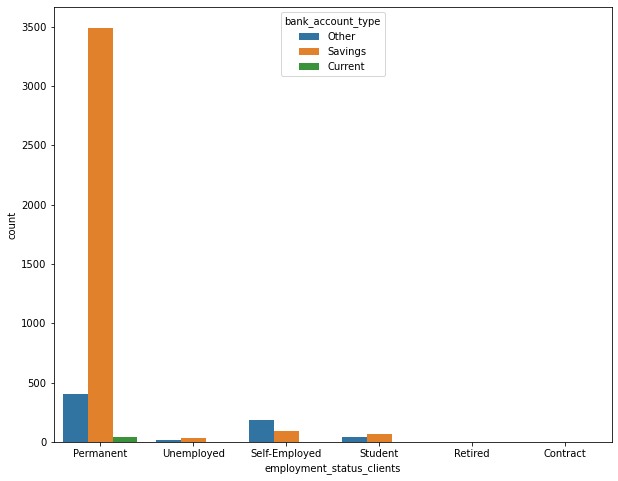

In [46]:
#checking the graphical distribution of bank account types by employment status
plt.figure(figsize=(10, 8))
sns.countplot(data= new_train, x='employment_status_clients', hue='bank_account_type')


In [47]:
# filling null employment status values
dict = {'Other':'Self-Employed', 'Savings':'Permanent', 'Current':'Permanent'}
new_train['employment_status_clients'] = new_train['employment_status_clients'].fillna(new_train['bank_account_type'].map(dict))

In [48]:
new_test.isnull().sum()

customerid                   0
birthdate                    0
bank_account_type            0
bank_name_clients            0
employment_status_clients    0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
total_prevloans              0
cumulative_prevtotaldue      0
dtype: int64

In [49]:
# filling null employment status values in the test dataset
new_test['employment_status_clients'] = new_test['employment_status_clients'].fillna(new_test['bank_account_type'].map(dict))

In [50]:
new_train.isnull().sum()

customerid                   0
birthdate                    0
bank_account_type            0
bank_name_clients            0
employment_status_clients    0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
total_prevloans              0
cumulative_prevtotaldue      0
dtype: int64

In [51]:
# check for duplicates
new_train.duplicated().sum()

8

In [52]:
# drop duplicates ()
new_train.drop_duplicates(inplace=True)

In [53]:
new_train.duplicated().sum()

0

In [54]:
new_test.duplicated().sum()

0

In [55]:
new_train.dtypes

customerid                    object
birthdate                     object
bank_account_type             object
bank_name_clients             object
employment_status_clients     object
systemloanid                   int64
loannumber                     int64
approveddate                  object
creationdate                  object
loanamount                   float64
totaldue                     float64
termdays                       int64
good_bad_flag                 object
total_prevloans              float64
cumulative_prevtotaldue      float64
dtype: object

In [56]:
# changing the datatypes of 'birthdate','approveddate', 'creationdate' to datetime

new_train[['birthdate','approveddate', 'creationdate']]=new_train[['birthdate','approveddate', 'creationdate']].astype('datetime64')

In [57]:
new_train.dtypes

customerid                           object
birthdate                    datetime64[ns]
bank_account_type                    object
bank_name_clients                    object
employment_status_clients            object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                          float64
totaldue                            float64
termdays                              int64
good_bad_flag                        object
total_prevloans                     float64
cumulative_prevtotaldue             float64
dtype: object

In [58]:
#check datatypes of the test dataset
new_test.dtypes

customerid                    object
birthdate                     object
bank_account_type             object
bank_name_clients             object
employment_status_clients     object
systemloanid                   int64
loannumber                     int64
approveddate                  object
creationdate                  object
loanamount                     int64
totaldue                     float64
termdays                       int64
total_prevloans              float64
cumulative_prevtotaldue      float64
dtype: object

In [59]:
#changing the data type of birthdate in the test dataset to datetime

new_test[['birthdate']]=new_test[['birthdate']].astype('datetime64')

In [60]:
new_test.dtypes

customerid                           object
birthdate                    datetime64[ns]
bank_account_type                    object
bank_name_clients                    object
employment_status_clients            object
systemloanid                          int64
loannumber                            int64
approveddate                         object
creationdate                         object
loanamount                            int64
totaldue                            float64
termdays                              int64
total_prevloans                     float64
cumulative_prevtotaldue             float64
dtype: object

In [61]:
# creating a new column 'year' by extracting the year from the approveddate
new_train['year'] = new_train['approveddate'].dt.year

In [62]:
new_train['year'].unique()

array([2017], dtype=int64)

In [63]:
# creating a new column 'age' by subtracting the birthdate from the only unique approveddate year (2017)
new_test['age'] = 2017 - new_test['birthdate'].dt.year
new_test.age.head()

0    35
1    35
2    36
3    35
4    42
Name: age, dtype: int64

In [64]:
new_train['age'] = 2017 - new_train['birthdate'].dt.year
new_train.age.head()

0    45
1    32
2    33
3    40
4    31
Name: age, dtype: int64

In [65]:
new_test.head()

,customerid,birthdate,bank_account_type,bank_name_clients,employment_status_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,total_prevloans,cumulative_prevtotaldue,age
0,8a858899538ddb8e015390510b321f08,1982-08-08,Savings,GT Bank,Permanent,301998974,4,40:48.0,39:35.0,10000,12250.0,30,26000.0,32900.0,35
1,8a858959537a097401537a4e316e25f7,1982-08-08,Savings,GT Bank,Permanent,301963615,10,43:40.0,42:34.0,40000,44000.0,30,215000.0,248400.0,35
2,8a8589c253ace09b0153af6ba58f1f31,1981-09-05,Savings,UBA,Permanent,301982236,6,15:11.0,15:04.0,20000,24500.0,30,65000.0,79675.0,36
3,8a858e095aae82b7015aae86ca1e030b,1982-08-08,Savings,GT Bank,Permanent,301971730,8,00:54.0,00:49.0,30000,34500.0,30,120000.0,135400.0,35
4,8a858e225a28c713015a30db5c48383d,1975-08-25,Savings,UBA,Permanent,301959177,4,04:33.0,04:27.0,20000,24500.0,30,30000.0,37500.0,42


In [66]:
new_test.dtypes

customerid                           object
birthdate                    datetime64[ns]
bank_account_type                    object
bank_name_clients                    object
employment_status_clients            object
systemloanid                          int64
loannumber                            int64
approveddate                         object
creationdate                         object
loanamount                            int64
totaldue                            float64
termdays                              int64
total_prevloans                     float64
cumulative_prevtotaldue             float64
age                                   int64
dtype: object

In [67]:
new_train.head()

,customerid,birthdate,bank_account_type,bank_name_clients,employment_status_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,total_prevloans,cumulative_prevtotaldue,year,age
0,8a2a81a74ce8c05d014cfb32a0da1049,1972-01-15,Other,Diamond Bank,Permanent,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,200000.0,242900.0,2017,45
1,8a85886e54beabf90154c0a29ae757c0,1985-08-23,Savings,GT Bank,Permanent,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,0.0,0.0,2017,32
2,8a8588f35438fe12015444567666018e,1984-09-18,Other,EcoBank,Permanent,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,60000.0,70500.0,2017,33
3,8a85890754145ace015429211b513e16,1977-10-10,Savings,First Bank,Permanent,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,20000.0,24500.0,2017,40
4,8a858970548359cc0154883481981866,1986-09-07,Other,GT Bank,Permanent,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,150000.0,188400.0,2017,31


In [68]:
# dropped less important columns

new_traindf = new_train.drop(columns = ['customerid', 'birthdate', 'systemloanid', 'approveddate', 'creationdate', 'year'])
new_testdf = new_test.drop(columns = ['customerid','birthdate', 'systemloanid', 'approveddate', 'creationdate'])

In [69]:
new_traindf.head()

,bank_account_type,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag,total_prevloans,cumulative_prevtotaldue,age
0,Other,Diamond Bank,Permanent,12,30000.0,34500.0,30,Good,200000.0,242900.0,45
1,Savings,GT Bank,Permanent,2,15000.0,17250.0,30,Good,0.0,0.0,32
2,Other,EcoBank,Permanent,7,20000.0,22250.0,15,Good,60000.0,70500.0,33
3,Savings,First Bank,Permanent,3,10000.0,11500.0,15,Good,20000.0,24500.0,40
4,Other,GT Bank,Permanent,9,40000.0,44000.0,30,Good,150000.0,188400.0,31


# Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
encoder = LabelEncoder()

In [72]:
# we encoded the categorical variables, fit_transform on the train and transform only on the test.

new_traindf['bank_account_type'] = encoder.fit_transform(new_traindf['bank_account_type'])
new_testdf['bank_account_type'] = encoder.transform(new_testdf['bank_account_type'])

new_traindf['bank_name_clients'] = encoder.fit_transform(new_traindf['bank_name_clients'])
new_testdf['bank_name_clients'] = encoder.transform(new_testdf['bank_name_clients'])

new_traindf['employment_status_clients'] = encoder.fit_transform(new_traindf['employment_status_clients'])
new_testdf['employment_status_clients'] = encoder.transform(new_testdf['employment_status_clients'])

In [73]:
# we encoded the target variable in the train dataset too. the test dataset does not have the target variable.
new_traindf['good_bad_flag'] = encoder.fit_transform(new_traindf['good_bad_flag'])

In [74]:
new_traindf.head()

,bank_account_type,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag,total_prevloans,cumulative_prevtotaldue,age
0,1,1,1,12,30000.0,34500.0,30,1,200000.0,242900.0,45
1,2,6,1,2,15000.0,17250.0,30,1,0.0,0.0,32
2,1,2,1,7,20000.0,22250.0,15,1,60000.0,70500.0,33
3,2,5,1,3,10000.0,11500.0,15,1,20000.0,24500.0,40
4,1,6,1,9,40000.0,44000.0,30,1,150000.0,188400.0,31


# Scaling

## This process was later excluded becauseit was causing our model to be overfitted

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
# breaking the train dataset into 2. The predictor variables (X), and the target variable (y)

X = new_traindf.drop(columns = ['good_bad_flag'])
y = new_traindf.good_bad_flag

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# splitting our trani dataset into 4 subsets as X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [81]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    LogisticRegression(solver='liblinear', max_iter=100, random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    XGBClassifier(n_estimators=500, max_depth=5, random_state=42),
    LGBMClassifier(n_estimators=500, max_depth=5, random_state=42),
    AdaBoostClassifier(n_estimators=500, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print(model)
    print(score)
    print(classification_report(y_test, y_pred))


RandomForestClassifier(max_depth=5, random_state=42)
0.782608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.78      1.00      0.88       684

    accuracy                           0.78       874
   macro avg       0.39      0.50      0.44       874
weighted avg       0.61      0.78      0.69       874

DecisionTreeClassifier(max_depth=5, random_state=42)
0.7711670480549199
              precision    recall  f1-score   support

           0       0.19      0.02      0.03       190
           1       0.78      0.98      0.87       684

    accuracy                           0.77       874
   macro avg       0.48      0.50      0.45       874
weighted avg       0.65      0.77      0.69       874

LogisticRegression(random_state=42, solver='liblinear')
0.782608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0

## The four models below are the 4 best performing models from the models above
* GaussianNB()
* KNeighborsClassifier(n_neighbors=3)
* XGBClassifier(n_estimators=500, max_depth=5, random_state=42)
* LGBMClassifier(n_estimators=500, max_depth=5, random_state=42)

In [81]:
# applying the KNeighborsClassifier model

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print(score)
print(classification_report(y_test, y_pred))

0.7231121281464531
              precision    recall  f1-score   support

           0       0.28      0.17      0.21       190
           1       0.79      0.88      0.83       684

    accuracy                           0.72       874
   macro avg       0.54      0.52      0.52       874
weighted avg       0.68      0.72      0.70       874



In [82]:
submission = pd.read_csv('SampleSubmission.csv')

In [83]:
submission.head()

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1


In [84]:
y_prob = model.predict_proba(X_test)[:,1]
y_prob

array([0.66666667, 1.        , 0.        , 1.        , 1.        ,
       0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.66666667, 0.66666667, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.66666667, 0.66666667, 0.66666667, 1.        ,
       0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.66666667, 0.66666667, 1.        ,
       0.66666667, 0.66666667, 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 1.        , 0.66666667,
       0.66666667, 0.66666667, 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.33333333, 0.66666667, 1.        , 0.33333333, 0.66666667,
       0.33333333, 1.        , 0.66666667, 0.33333333, 1.        ,
       0.33333333, 0.66666667, 1.        , 1.        , 1.     

In [86]:
final_predict = model.predict_proba(new_testdf.values)[:,1]

In [87]:
submission['Good_Bad_flag'] = final_predict
submission.sample(5)

,customerid,Good_Bad_flag
923,8a858f305c8dd672015c9d82080e7f53,0.666667
860,8a858f245d1dfd3e015d1e3c6bad1ae8,1.000000
486,8a858e7d5b591490015b59618de419b4,1.000000
75,8a8588fd53c244bc0153c7d786e9171d,1.000000
560,8a858ea555d9e6020155efaba6540a82,1.000000


In [88]:
submission['Good_Bad_flag'].unique()

array([0.66666667, 1.        , 0.        , 0.33333333])

In [89]:
d = {'customerid' : new_test['customerid'], 'Good_Bad_flag' : final_predict}
test_predictions = pd.DataFrame(data = d)
test_predictions = test_predictions[['customerid', 'Good_Bad_flag']]
test_predictions.sample(20)

,customerid,Good_Bad_flag
544,8a8588dc5384a05f0153895b425a2a63,1.000000
770,8a8588c2546bf759015471842d602473,1.000000
1442,8a858f615b1ffb14015b200e2dc10f69,0.666667
1375,8a858edc59e0d8f70159eba2590759b5,0.666667
1118,8a858e905bf2fa58015bf676bbf639a1,1.000000
1424,8a858f305c8dd672015c9b6de9735c21,1.000000
44,8a858ffe5c44d5b6015c450d4ba52a5c,0.333333
264,8a858fa95c695f85015c722c61b67dce,1.000000
497,8a858f6e5cb16eb9015cbf6316b4273f,1.000000
699,8a858ff55b5d377b015b5d3ab51105e5,1.000000


In [90]:
# unique predictions
test_predictions['Good_Bad_flag'].unique()

array([0.66666667, 1.        , 0.        , 0.33333333])

In [92]:
test_predictions.to_csv('Submission1.csv', index = False)